This report aims to evaluate the implemented PCA algorithm. In evaluation, two databases of the Promise repository will be used: http://promise.site.uottawa.ca/SERepository/datasets-page.html

# PCA

**Principal Component Analysis (PCA)** is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set.

The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. The same is done by transforming the variables to a new set of variables, which are known as the principal components (or simply, the PCs) and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order. So, in this way, the 1st principal component retains maximum variation that was present in the original components. The principal components are the eigenvectors of a covariance matrix, and hence they are orthogonal.


In [1]:
#Used Modules
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Developed Modules
import misc
import PCA

### Introduction

Here, our desired outcome of the principal component analysis is to project a feature space (our dataset consisting of *n* *m*-dimensional samples) onto a smaller subspace that represents our data “well”.

**The basic steps for PCA algorithm are:**

- The mean is calculated and the entire data set normalized.
- The covariance matrix is calculated.
- The eigenvectors and eigenvalues of the covariance matrix are then calculated.
- The K eigenvectors with the greatest amount of associated information are chosen.
- We assemble the projection matrix P based on previously selected eigenvectors.
- The normalized image obtained in step 1 is projected by the projection matrix.




Using dataset: sample.csv


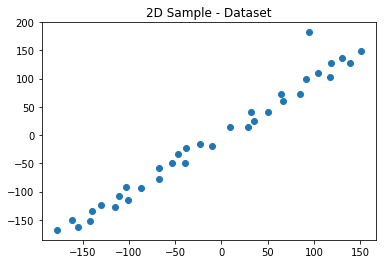

In [2]:
#---Using an artificial dataset with only two dimensions to illustrate how the PCA works.
dataset = misc.loadData('sample.csv')
dataset = np.asarray(dataset)

plt.scatter(dataset[:,0],dataset[:,1])
plt.title("2D Sample - Dataset", fontsize='large')
plt.show()

The number of eigenvectors generated is equal to the number of dimensions of the dataset, so in the present example, two eigenvectors are gerenerated, each with the same dimension as the dataset(two dimensions).  

In [3]:
#---The two eigenvectors are:
eigenValues, eigenVectors = PCA.pca_eigen(dataset)
np.set_printoptions(precision=3)
print eigenVectors[:,0],eigenVectors[:,1]

[-0.696 -0.718] [-0.718  0.696]


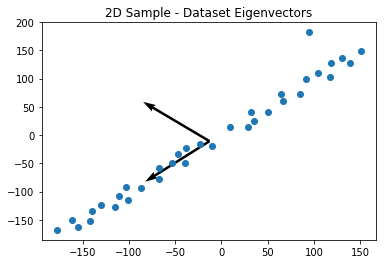

In [4]:
#---The center of the distribution is the mean of each coordinate:
x_center = sum(dataset[:,0])/dataset.shape[0]
y_center = sum(dataset[:,1])/dataset.shape[0]

#---Representing orientation of the vectors in 2-Dimensions:
ev_x = eigenVectors[0,:]
ev_y = eigenVectors[1,:]


plt.quiver([x_center, x_center], [y_center, y_center], ev_x, ev_y, angles='xy', scale_units='xy', scale=0.01)
plt.scatter(dataset[:,0],dataset[:,1])
plt.title("2D Sample - Dataset Eigenvectors", fontsize='large')
plt.show()

The Eigenvalues associated for each Eigenvectors will be used to know how much of information it's Eigenvector carries. 

[20515.561   151.385]


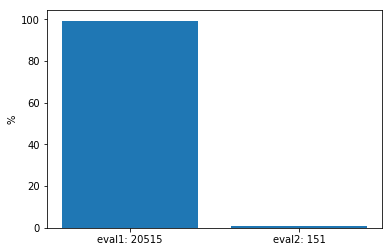

In [5]:
#---The eigenvalues are:
print eigenValues
#---Where the percent of information distribuition for each vector is:

plt.bar(['eval1: '+str(int(eigenValues[0])),'eval2: '+str(int(eigenValues[1]))],[100*eigenValues[0]/sum(eigenValues),100*eigenValues[1]/sum(eigenValues)])
plt.ylabel('%')
plt.show()

As observeved on the previous chart, around 99% of all information is representend on the first eigenvector, thus, the dataset can be redimensioned to one dimension using just this vector, without significant loss of information. 

Dataset before PCA dimension: (35, 2)
Dataset after PCA dimension: (35, 1)


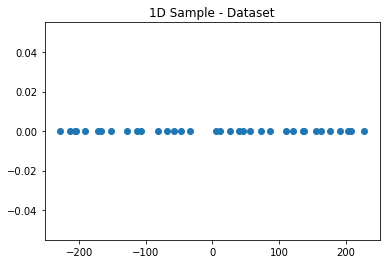

In [6]:
#---Applying PCA using just the first eigenvector
print "Dataset before PCA dimension: "+repr(dataset.shape)
Z = PCA.pca(dataset,1)
print "Dataset after PCA dimension: "+repr(Z.shape)
plt.plot(Z, np.zeros(35), 'o')
plt.title("1D Sample - Dataset", fontsize='large')
plt.show()

## Results

#### Using the CM1 dataset from promise repository http://promise.site.uottawa.ca/SERepository/datasets/cm1.arff

In [7]:
#---loading dataset
dataset = misc.loadData('cm1.arff')
dataset = np.asarray(dataset)

#---spliting it in instances and class
dataset_attributes = dataset[:,range(len(dataset[0])-1)]
dataset_class = dataset[:,-1]

eigenValues, eigenVectors = PCA.pca_eigen(dataset_attributes)
print "The Dataset contains: "+repr(dataset.shape[0])+" instances and "+repr(dataset_attributes.shape[1])+" feature dimensions"

Using dataset: cm1.arff
The Dataset contains: 498 instances and 21 feature dimensions


Eigenvalues:
[1.806e+10 6.835e+05 8.747e+02 2.879e+02 2.579e+02 1.887e+02 1.533e+02
 9.445e+01 3.403e+01 3.114e+01 1.693e+01 5.397e+00 3.995e+00 3.009e+00
 2.636e+00 3.844e-01 2.412e-02 7.322e-03 2.316e-04 9.668e-06 1.776e-06]

Descent ordered eigenvalues information distribution:
99.99620449721824 %
0.0037846803218852198 %
4.843441135125001e-06 %
1.5940452594818405e-06 %
1.4278938868970597e-06 %
1.0451533675766087e-06 %
8.487237506668409e-07 %
5.230442371353473e-07 %
1.8843931715708194e-07 %
1.724214279273341e-07 %
9.373077808480639e-08 %
2.9885540219050435e-08 %
2.2121148387323875e-08 %
1.665976834565595e-08 %
1.4596351830060744e-08 %
2.1283793955989337e-09 %
1.335853162525877e-10 %
4.0546048766968066e-11 %
1.282737602363036e-12 %
5.353757153239989e-14 %
9.832808454517664e-15 %


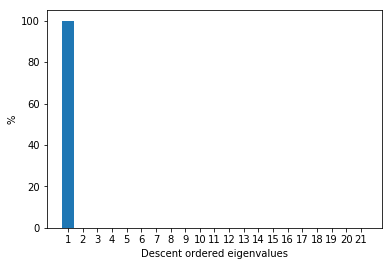

In [8]:
#---The eigenvalues are:
print "Eigenvalues:\n",eigenValues

#---Where the percent of information distribuition for each vector is:
x = []
for i in range(dataset_attributes.shape[1]):
    x.append(str(i+1))
y = []
print "\nDescent ordered eigenvalues information distribution:"
for i in range(dataset_attributes.shape[1]):
    y.append(100*eigenValues[i]/sum(eigenValues))
    print str(y[i])+' %'

plt.bar(x,y)
plt.xlabel('Descent ordered eigenvalues')
plt.ylabel('%')
plt.show()

For 1 Eigenvectors:  Accuracy using 3-nn = 84.93983614951357%
For 2 Eigenvectors:  Accuracy using 3-nn = 84.93343573988736%
For 3 Eigenvectors:  Accuracy using 3-nn = 84.93343573988736%
For 4 Eigenvectors:  Accuracy using 3-nn = 85.13504864311315%
For 5 Eigenvectors:  Accuracy using 3-nn = 84.93663594470046%
For 6 Eigenvectors:  Accuracy using 3-nn = 85.13824884792626%
For 7 Eigenvectors:  Accuracy using 3-nn = 85.13824884792626%
For 8 Eigenvectors:  Accuracy using 3-nn = 85.33666154633896%
For 9 Eigenvectors:  Accuracy using 3-nn = 85.33666154633896%
For 10 Eigenvectors:  Accuracy using 3-nn = 85.33666154633896%
For 11 Eigenvectors:  Accuracy using 3-nn = 85.33666154633896%
For 12 Eigenvectors:  Accuracy using 3-nn = 85.33666154633896%
For 13 Eigenvectors:  Accuracy using 3-nn = 85.33666154633896%
For 14 Eigenvectors:  Accuracy using 3-nn = 85.33666154633896%
For 15 Eigenvectors:  Accuracy using 3-nn = 85.33666154633896%
For 16 Eigenvectors:  Accuracy using 3-nn = 85.33666154633896%
F

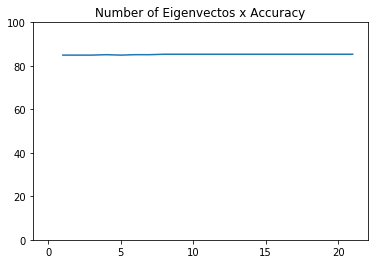

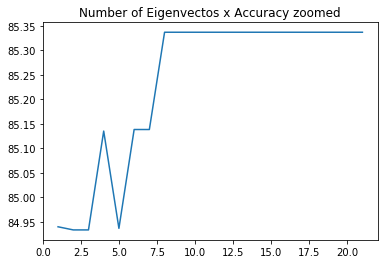

In [93]:
#---In order to verify the influence of each vector and it's capability to represent the data, a comparison
#is then made, where the K(number of cumulative descending eigenvectors) will vary from 1 to the max number
#of dimensions present in the data, and a 1-nn classifier will be user to verify the influence of each K.

scores_ = []
k_ = []
for K in range(1,dataset_attributes.shape[1]+1):
    k_.append(K)
    #-------------------------------PCA application---------
    Z = PCA.pca(dataset_attributes,K)
    #-------------------------------cross validation--------
    knn = KNeighborsClassifier(n_neighbors=1) 
    score = cross_val_score(knn, Z, dataset_class, cv=4)
    scores_.append(score.mean()*100)
    print "For "+repr(K)+" Eigenvectors: "+" Accuracy using 3-nn = "+repr(score.mean()*100) + '%'
    
plt.plot(k_,scores_,0,100)
plt.title("Number of Eigenvectos x Accuracy", fontsize='large')
plt.ylim(0,100)
plt.show()
plt.plot(k_,scores_)
plt.title("Number of Eigenvectos x Accuracy zoomed", fontsize='large')
plt.show()

**Time analisys**

In [139]:
#---A time analisys is then made in order to compare how a dimension reduction using PCA
#might improve some algorithms running time, a 10-nn classifier will be used for that test.

#First it will run a 10-fold cross validation on raw dataset, that is, without using PCA
start = time.time()
knn = KNeighborsClassifier(n_neighbors=10)
score = cross_val_score(knn, dataset_attributes, dataset_class, cv=10)
end = time.time()
print "Elapsed time without PCA: "+repr(int((end - start)*1000))+" ms"

#Then it will run a 10-fold cross validation on 1D dataset, that is, using PCA with K=1
Z = PCA.pca(dataset_attributes,1)

start = time.time()
knn = KNeighborsClassifier(n_neighbors=10)
score = cross_val_score(knn, Z, dataset_class, cv=10)
end = time.time()
print "Elapsed time with PCA: "+repr(int((end - start)*1000))+" ms"


Elapsed time without PCA: 45 ms
Elapsed time with PCA: 36 ms


#### Using the JM1 dataset from promise repository http://promise.site.uottawa.ca/SERepository/datasets/cm1.arff

In [9]:
#---loading dataset
dataset = misc.loadData('kc1.arff')
dataset = np.asarray(dataset)

#---spliting it in instances and class
dataset_attributes = dataset[:,range(len(dataset[0])-1)]
dataset_class = dataset[:,-1]

eigenValues, eigenVectors = PCA.pca_eigen(dataset_attributes)
print "The Dataset contains: "+repr(dataset.shape[0])+" instances and "+\
repr(dataset_attributes.shape[1])+" feature dimensions"

Using dataset: kc1.arff
The Dataset contains: 2109 instances and 21 feature dimensions


Eigenvalues:
[3.055e+08 3.599e+04 1.356e+02 8.392e+01 6.783e+01 2.470e+01 1.123e+01
 9.287e+00 7.550e+00 3.680e+00 2.200e+00 1.466e+00 1.212e+00 5.805e-01
 4.415e-01 3.665e-01 5.983e-02 3.084e-02 2.699e-03 8.814e-06 2.824e-06]

Descent ordered eigenvalues information distribution:
99.98810537382431 %
0.011780036236268315 %
4.436964151217034e-05 %
2.746432276758766e-05 %
2.2201059071043128e-05 %
8.084431802939085e-06 %
3.6739911244271908e-06 %
3.0396280131288845e-06 %
2.470989695408456e-06 %
1.2043611302964167e-06 %
7.200269018889063e-07 %
4.798094616324463e-07 %
3.966913368676025e-07 %
1.8999938371241066e-07 %
1.4448095909752588e-07 %
1.1994449920632088e-07 %
1.9582266287429766e-08 %
1.009222607945673e-08 %
8.834726533522662e-10 %
2.8848285371690695e-12 %
9.241477063282489e-13 %


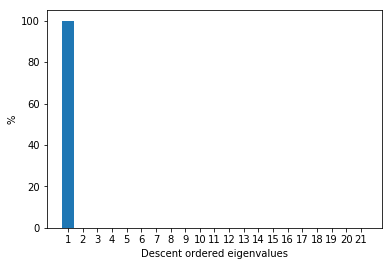

In [100]:
#---The eigenvalues are:
print "Eigenvalues:\n",eigenValues

#---Where the percent of information distribuition for each vector is:
x = []
for i in range(dataset_attributes.shape[1]):
    x.append(str(i+1))
y = []
print "\nDescent ordered eigenvalues information distribution:"
for i in range(dataset_attributes.shape[1]):
    y.append(100*eigenValues[i]/sum(eigenValues))
    print str(y[i])+' %'

plt.bar(x,y)
plt.xlabel('Descent ordered eigenvalues')
plt.ylabel('%')
plt.show()

For 1 Eigenvectors:  Accuracy using 3-nn = 80.09336450309355%
For 2 Eigenvectors:  Accuracy using 3-nn = 80.65962153438679%
For 3 Eigenvectors:  Accuracy using 3-nn = 80.6587230617902%
For 4 Eigenvectors:  Accuracy using 3-nn = 80.70611642671912%
For 5 Eigenvectors:  Accuracy using 3-nn = 80.70611642671912%
For 6 Eigenvectors:  Accuracy using 3-nn = 80.80112883926708%
For 7 Eigenvectors:  Accuracy using 3-nn = 80.75350979164803%
For 8 Eigenvectors:  Accuracy using 3-nn = 80.89591769820687%
For 9 Eigenvectors:  Accuracy using 3-nn = 80.89591769820687%
For 10 Eigenvectors:  Accuracy using 3-nn = 80.89591769820687%
For 11 Eigenvectors:  Accuracy using 3-nn = 80.89591769820687%
For 12 Eigenvectors:  Accuracy using 3-nn = 80.9433110631358%
For 13 Eigenvectors:  Accuracy using 3-nn = 80.9433110631358%
For 14 Eigenvectors:  Accuracy using 3-nn = 80.9433110631358%
For 15 Eigenvectors:  Accuracy using 3-nn = 80.9433110631358%
For 16 Eigenvectors:  Accuracy using 3-nn = 80.9433110631358%
For 17 

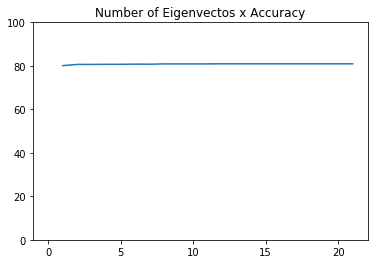

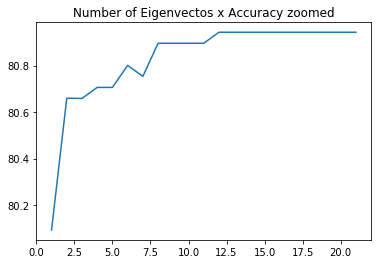

In [107]:
#---In order to verify the influence of each vector and it's capability to represent the data, a comparison
#is then made, where the K(number of cumulative descending eigenvectors) will vary from 1 to the max number
#of dimensions present in the data, and a 3-nn classifier will be user to verify the influence of each K.

scores_ = []
k_ = []

for K in range(1,dataset_attributes.shape[1]+1):
    k_.append(K)
    #-------------------------------PCA application---------
    Z = PCA.pca(dataset_attributes,K)
    #-------------------------------cross validation--------
    knn = KNeighborsClassifier(n_neighbors=3) 
    score = cross_val_score(knn, Z, dataset_class, cv=10)
    scores_.append(score.mean()*100)
    print "For "+repr(K)+" Eigenvectors: "+" Accuracy using 3-nn = "+repr(score.mean()*100) + '%'
    
plt.plot(k_,scores_,0,100)
plt.title("Number of Eigenvectos x Accuracy", fontsize='large')
plt.ylim(0,100)
plt.show()
plt.plot(k_,scores_)
plt.title("Number of Eigenvectos x Accuracy (zoomed)", fontsize='large')
plt.show()

**Time analisys**

In [142]:
#---A time analisys is then made in order to compare how a dimension reduction using PCA
#might improve some algorithms running time, a 10-nn classifier will be used for that test.

#First it will run a 10-fold cross validation on raw dataset, that is, without using PCA
start = time.time()
knn = KNeighborsClassifier(n_neighbors=10)
score = cross_val_score(knn, dataset_attributes, dataset_class, cv=10)
end = time.time()
print "Elapsed time without PCA: "+repr(int((end - start)*1000))+" ms"

#Then it will run a 10-fold cross validation on 1D dataset, that is, using PCA with K=1
Z = PCA.pca(dataset_attributes,1)

start = time.time()
knn = KNeighborsClassifier(n_neighbors=10)
score = cross_val_score(knn, Z, dataset_class, cv=10)
end = time.time()
print "Elapsed time with PCA: "+repr(int((end - start)*1000))+" ms"


Elapsed time without PCA: 112 ms
Elapsed time with PCA: 94 ms


## Conclusions

The values presented in Table 1 below demonstrate the expected, increasing the number of eigenvectors leads the rate of accuracy to increase as well. Another observation to be made is that the smaller the difference between the accuracys as the amount of eigenvectors(K) increses, the better is, this means that the dataset can be well represented with a reduced size, thereby increasing performance and decreasing processing time for some learning algorithm that turns out to be used in the future. This fact is visible in table 2 where it is possible to verify this characteristic, it is also visible that the larger the dataset the better the improvement in the reduction of computation time made by the reduction of size.

**Table - Accuracy for diferent k values**

|    | k=1 |k=10| k=21 |
|--------|--------|--------|------|
|   CM1 | 84.93 %|  85.33 % | 85.33 % |
|   KC1 | 80.09 %|80.89 %| 80.94 % |


**Table - Time elapsed in ms**

| This   | no-PCA | PCA K=1 | 
|--------|--------|--------|------|
|   CM1 (498 instances) |45ms| 36ms | 
|   KC1 (2109 instances) | 112ms | 94ms  |